In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
# Import API key
from config import api_key_weather

In [3]:
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []


In [7]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [9]:
# Print the city count to confirm sufficient count
len(cities)

614

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [11]:
print (cities)

['kavaratti', 'bluff', 'buraydah', 'phan rang', 'saint-philippe', 'belyy yar', 'ankang', 'poptun', 'jamestown', 'san patricio', 'kapaa', 'vardo', 'rikitea', 'oksfjord', 'iwanai', 'mataura', 'barkhan', 'qaanaaq', 'cherskiy', 'oussouye', 'ilulissat', 'san cristobal', 'naryan-mar', 'agar', 'hasaki', 'shenjiamen', 'amderma', 'berlevag', 'castro', 'mount gambier', 'santa cruz cabralia', 'obo', 'taltal', 'deh rawud', 'bathsheba', 'hobart', 'cape town', 'nanortalik', 'talnakh', 'airai', 'qasigiannguit', 'hermanus', 'albany', 'labuhan', 'espanola', 'rumonge', 'beringovskiy', 'bengkulu', 'mahebourg', 'provideniya', 'biak', 'linares', 'atuona', 'souillac', 'busselton', 'punta arenas', 'svetlogorsk', 'khao wong', 'ushuaia', 'haines junction', 'kirakira', 'illoqqortoormiut', 'ancud', 'grindavik', 'camacha', 'nemuro', 'upernavik', 'bredasdorp', 'alofi', 'moerai', 'yala', 'nikolskoye', 'bilibino', 'pisco', 'aklavik', 'arraial do cabo', 'yulara', 'fuerte olimpo', 'tuktoyaktuk', 'oranjemund', 'atherto

In [12]:
df = pd.DataFrame(cities)
df.head()

,0
0,kavaratti
1,bluff
2,buraydah
3,phan rang
4,saint-philippe


In [13]:
df["Cloudiness"] = ""
df["Country"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""
df.head()

,0,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kavaratti,,,,,,,,
1,bluff,,,,,,,,
2,buraydah,,,,,,,,
3,phan rang,,,,,,,,
4,saint-philippe,,,,,,,,


In [14]:
# create a params dict that will be updated with new city each iteration
params = {"key": api_key_weather}

In [15]:
# Loop through the df 
for index, row in df.iterrows():
    city = row[0]
    base_url= "http://history.openweathermap.org/data/2.5/history/city?"
    query_url = url + "appid=" + api_key_weather + "&q=" + city
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    

    
    try:
        df.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        df.loc[index, "Country"] = weather_json["sys"]["country"]
        df.loc[index, "Date"] = weather_json["dt"]
        df.loc[index, "Humidity"] = weather_json["main"]["humidity"]
        df.loc[index, "Lat"] = weather_json["coord"]["lat"]
        df.loc[index, "Lng"] = weather_json["coord"]["lon"]
        df.loc[index, "Max Temp"] = weather_json["clouds"]["all"]
        df.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [16]:
df.head()

,0,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kavaratti,8,IN,1553381104,100,10.57,72.64,8,4.76
1,bluff,0,AU,1553381108,63,-23.58,149.07,0,2.51
2,buraydah,0,SA,1553378400,42,26.33,43.97,0,1
3,phan rang,,,,,,,,
4,saint-philippe,1,CA,1553381056,50,45.36,-73.48,1,10.3


In [17]:
df.columns

Index([           0, 'Cloudiness',    'Country',       'Date',   'Humidity',
              'Lat',        'Lng',   'Max Temp', 'Wind Speed'],
      dtype='object')

In [18]:
df.rename(columns = {0:"City"})

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kavaratti,8,IN,1553381104,100,10.57,72.64,8,4.76
1,bluff,0,AU,1553381108,63,-23.58,149.07,0,2.51
2,buraydah,0,SA,1553378400,42,26.33,43.97,0,1
3,phan rang,,,,,,,,
4,saint-philippe,1,CA,1553381056,50,45.36,-73.48,1,10.3
5,belyy yar,0,RU,1553378400,72,53.6,91.39,0,2.21
6,ankang,64,CN,1553381109,65,32.73,108.99,64,0.66
7,poptun,36,GT,1553381109,58,16.33,-89.42,36,1.56
8,jamestown,80,AU,1553381110,70,-33.21,138.6,80,6.36
9,san patricio,0,PY,1553381105,74,-26.98,-56.83,0,1.71


In [19]:
df['Lat'] = pd.to_numeric(df['Lat'])
df['Lng'] = pd.to_numeric(df['Lng'])
df['Max Temp'] = pd.to_numeric(df['Max Temp'])
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
0             614 non-null object
Cloudiness    614 non-null object
Country       614 non-null object
Date          614 non-null object
Humidity      614 non-null object
Lat           550 non-null float64
Lng           550 non-null float64
Max Temp      550 non-null float64
Wind Speed    550 non-null float64
dtypes: float64(4), object(5)
memory usage: 43.2+ KB


In [40]:
df.to_csv("Latitude_output.csv")

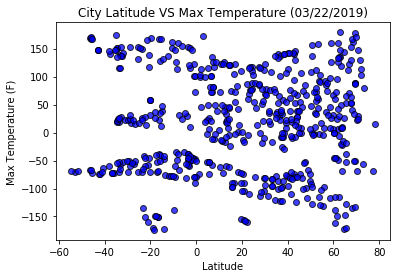

In [41]:
x_axis = df.iloc[:,5]
data = df.iloc[:,6]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Max Temperature (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('temp.png') 

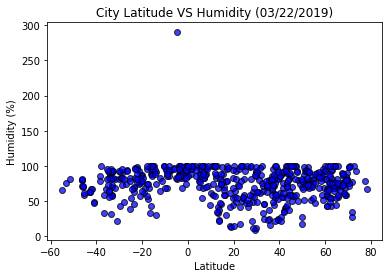

In [44]:
x_axis = df.iloc[:,5]
data = df.iloc[:,4]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Humidity (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./humidity.png")

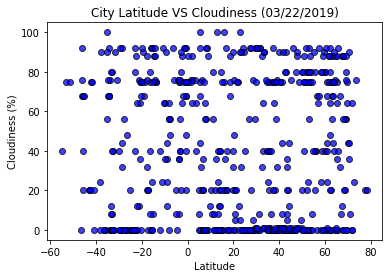

In [45]:
x_axis = df.iloc[:,5]
data = df.iloc[:,1]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Cloudiness (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./clouds.png")

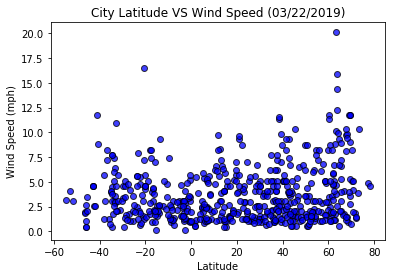

In [46]:
x_axis = df.iloc[:,5]
data = df.iloc[:,8]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Wind Speed (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("./wind.png")